## 1. Problem description

### 1.1. Dataset description
The dataset contains information about the real estate prices and house features for King County. It includes homes sold between May 2014 and May 2015.<br><br> The dataset is available here - https://www.kaggle.com/harlfoxem/housesalesprediction
<br><br> The data includes **21613 records** and **21 variables**: 
- price: `price`, 
- date of pricing: `date`, 
- the id of the house: `id`, 
- number of bedrooms: `bedrooms`, 
- number of bathrooms: `bathrooms`, 
- living space area: `sqft_living`, 
- lot area: `sqft_lot`, 
- number of floors: `floors`,
- whether the property id facing water: `waterfront`
- condition: `condition`
- grade: `grade`
- living area above ground level: `sqft_above`
- area of basement: `sqft_basement`
- the date the building was built: `yr_built`
- the date the building was built: `yr_renovated`
- zipcode: `zipcode`
- latitude: `lat`
- longitude: `long` 	
- living room area in 2015: `sqft_living15`
- lotsize area in 2015: `sqft_lot15`

### 1.2. Identifying the problem
The goal of the project is to **develop a machine learning model** which would **predict house prices**. <br><br>The aim is to find a model with the best performance by selecting relevant features from the dataset.

### 1.3. Methods of analysis
According to the nature of the problem several steps will be undertaken:
1. Firstly, I will conduct **a data analysis using Python libraries** to explore the variables,
2. Secondly, I will **visualise some of the most important variables**,
3. Next, **data pre-processing** will be undertaken which will include droping unnecessary columns and splitting the dataset into training and test sets,
4. Afterwards, I will build **three regression models**: Linear Regression, Decision Tree Regressor and Random Forest Regressor and compare performances of the models,
5. Lastly, I will discuss **results and potential next steps**.

## 2. Data exploration

### 2.1. Importing Python libraries

In [1]:
import numpy as np #linear algebra
import pandas as pd #data analysis tools including importing files and creating Python objects
import matplotlib.pyplot as plt #data visualisation
import matplotlib.dates as mdates #date plotting
import seaborn as sns #data visualisation
import datetime #dates and times manipulation
import random #generating pseudo random numbers

from sklearn.model_selection import train_test_split #splitting matrices into random train and test subsets
from sklearn.linear_model import LinearRegression #calculating linear regression
from sklearn.metrics import mean_squared_error, r2_score #functions measuring the quality of predictions
from sklearn.tree import DecisionTreeRegressor #creating Decission Tree Regression
from sklearn.ensemble import RandomForestRegressor #constructing a multitude of decision trees
from sklearn.model_selection import cross_validate #estimating the performance of a model

from statsmodels.stats.outliers_influence import variance_inflation_factor #checking collinearity
from statsmodels.tools.tools import add_constant #for checking collinearity

### 2.2. Importing data

In [2]:
house = pd.read_csv("https://raw.githubusercontent.com/joanlenczuk/House-Sales-Prediction-Project/master/kc_house_data.csv")

Importing the csv file and creating a Date Frame - `house`, using pandas library.

In [3]:
#Getting a quick overview of the data
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2.3. Exploring the shape of the data frame

In [4]:
print(f"The data frame contains of: {house.shape[0]} rows and {house.shape[1]} columns.")

The data frame contains of: 21613 rows and 21 columns.


### 2.4. Exploring variables

In [5]:
#summary of the data frame (index dtype, column dtypes, non-null values, memory usage)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### 2.5. Exploring basic statistics

In [6]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The average price of the house oscillates around **540k**. <br><br>
The interesting fact about the data is that the number of bedrooms highly differs. The difference between the highest number and the lowest number of bedrooms is equal to **33**.

### 2.6. Checking for missing values

In [7]:
#summarizing missing values for each variable
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**No missing values** were found, otherwise they should have been filled.

## 3. Data manipulation

### 3.1. Dropping columns
#### `zipcode`,`lat`,`long`,`sqft_living15`,`sqft_lot15`

In [8]:
house = house.drop(columns = ['zipcode','lat','long','sqft_living15','sqft_lot15'])

I decided on dropping columns including variables on the localization of the house (`zipcode`, `lat`,`long`) as well as `sqft_living15` and `sqft_lot15` as they will not be used in the modelling phase.

### 3.2. Creating new columns: `Age`, `WasRenovated`

I decided on creating two new columns: `Age` and `WasRenovated`, because they will be used in creating regression models instead of `yr_built` and `yr_renovated`.

**`Age`** determines the age of the house. It will be calculated by subtracting the year of pricing (from `date`) by the year the house was built (`yr_built`).

In [9]:
house['date']= pd.to_datetime(house['date'])

First I changed the type of `date` column (from object to datetime).

In [10]:
house['Age'] = house['date'].dt.year - house['yr_built']
house['Age'].head()

0    59
1    63
2    82
3    49
4    28
Name: Age, dtype: int64

**`WasRenovated`** is an indicator whether the house has been renovated. It includes values 0 (not renovated) or 1 (renovated).

In [11]:
house['WasRenovated'] = house['yr_renovated'].apply(lambda x: 0 if x== 0 else 1)

## 4. The exploration of variables

### 4.1. Exploring the dependent variable (`price`)

In [12]:
#setting parameters for the plots 
sns.set(rc={'figure.figsize':(10,8)})

In [13]:
#setting fonts for the plots
small = 11
medium = 13
big = 17

plt.rc('font', size=small)
plt.rc('axes', titlesize=medium)
plt.rc('axes', labelsize=medium)
plt.rc('xtick', labelsize=small)
plt.rc('ytick', labelsize=small)  
plt.rc('legend', fontsize=small)
plt.rc('axes', titlesize=big)

#### 4.1.1. The distribution of prices

The distribution of prices shows the number of observations that fall in each bin.

Text(0.5, 1.0, 'The distribution of prices')

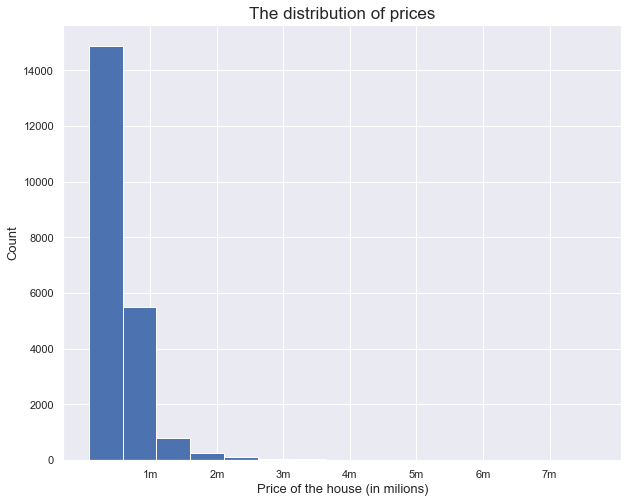

In [14]:
plt.hist(house['price'], bins = 15)
plt.xlabel('Price of the house (in milions)')
plt.ylabel('Count')
plt.xticks(range(1000000,8000000,1000000),('1m','2m','3m','4m','5m','6m','7m','8m'))
plt.title('The distribution of prices')

The vast majority of the houses cost **from 300k to 700k**. <br> <br> The prices of the second numerous group of houses oscilates **from 700k to 1.1m.**

#### 4.1.2. Changes of price over time

In order to plot the changes of price over time I grouped the date frame by the year and the month.

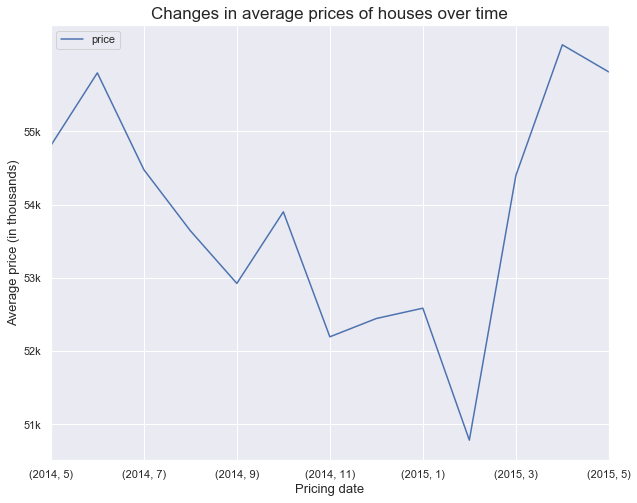

In [15]:
monthly_price=pd.DataFrame(house.groupby(by=[(house['date'].dt.year),(house['date'].dt.month)])
                           ['price'].mean()).plot()

plt.yticks(range(510000,560000,10000),('51k','52k','53k','54k','55k','56k'))
plt.xlabel('Pricing date')
plt.ylabel('Average price (in thousands)')
plt.title('Changes in average prices of houses over time')
plt.show()

Since May 2014 the prices have decreased three times: in September 2014, November 2014 and February 2015. After February 2015 prices have skyrocketed and then decreased again in April 2015. <br><br> However, the given time period is too narrow to use it in prediciting prices in the future.

### 4.2. Exploring the relationship between independent variables and `price`

#### 4.2.1. Exploring Pearson Correlation

Before conducting Pearson Correlation I dropped columns containing unsuitable data: `date`,`id`, `yr_built`,`yr_renovated` and categorical variables: `waterfront`,`WasRenovated`.

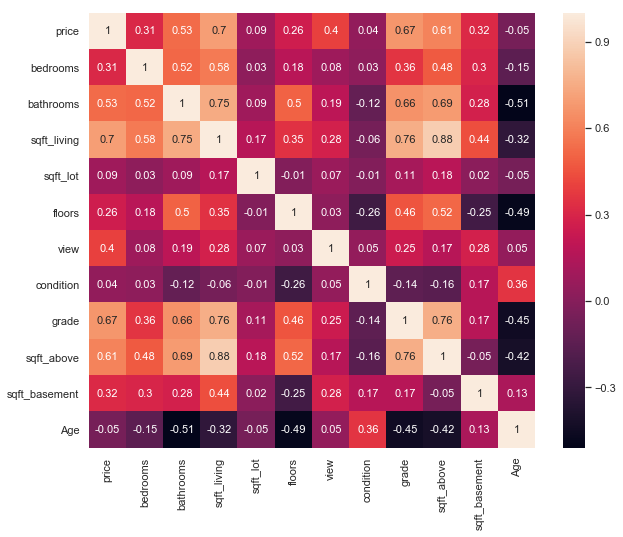

In [16]:
df_corr = house.drop(columns = ['waterfront','id','date','yr_built', 'yr_renovated','WasRenovated'])
corr_matrix = df_corr.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)

I set a threshold of **0.4** for variables not correlated to price. <br> <br>
Variables, which have a considerably high correlation coefficient with the price, include: **grade, view, bathrooms, sqft_living, sqft_above**.

#### 4.2.2. Variables with strong correlation

#### Violin plots for `grade`

Text(0.5, 1.0, 'Prices of houses depending on the grade')

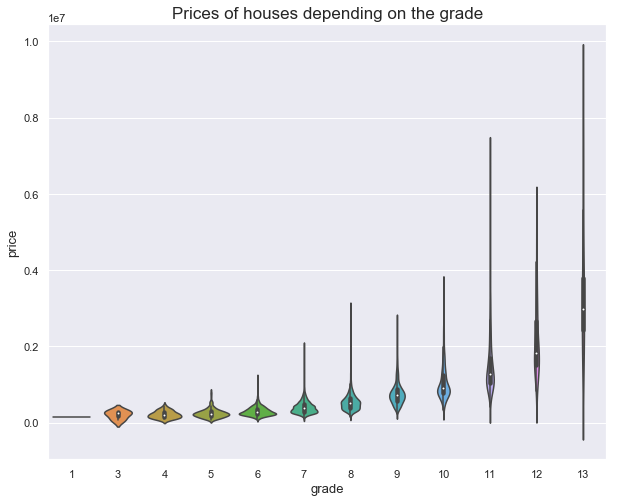

In [17]:
sns.violinplot(x = 'grade',y='price',data = house).set_title("Prices of houses depending on the grade")

The distribution of prices for each grade highly differs. Starting from the 3rd grade the median increases, but not linearly. <br><br>
As the grade gets higher, the prices are becoming less concentrated around the median.

#### Box plots for `view`

Text(0.5, 1.0, 'Prices of houses depending on the view')

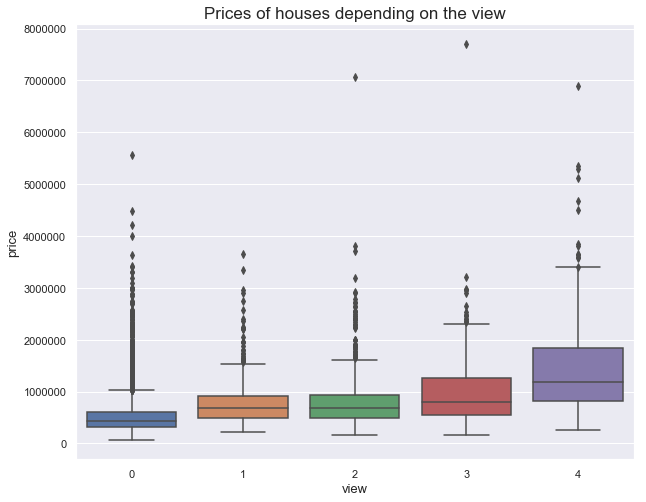

In [18]:
sns.boxplot(x = 'view',y='price',data = house).set_title("Prices of houses depending on the view")

Prices slightly increase as the view from the house gets better. <br><br>The higher the view score, the less concentrated the prices are.<br><br>


#### Scatter plots for `bathrooms`, `sqft_living`, `sqft_above`

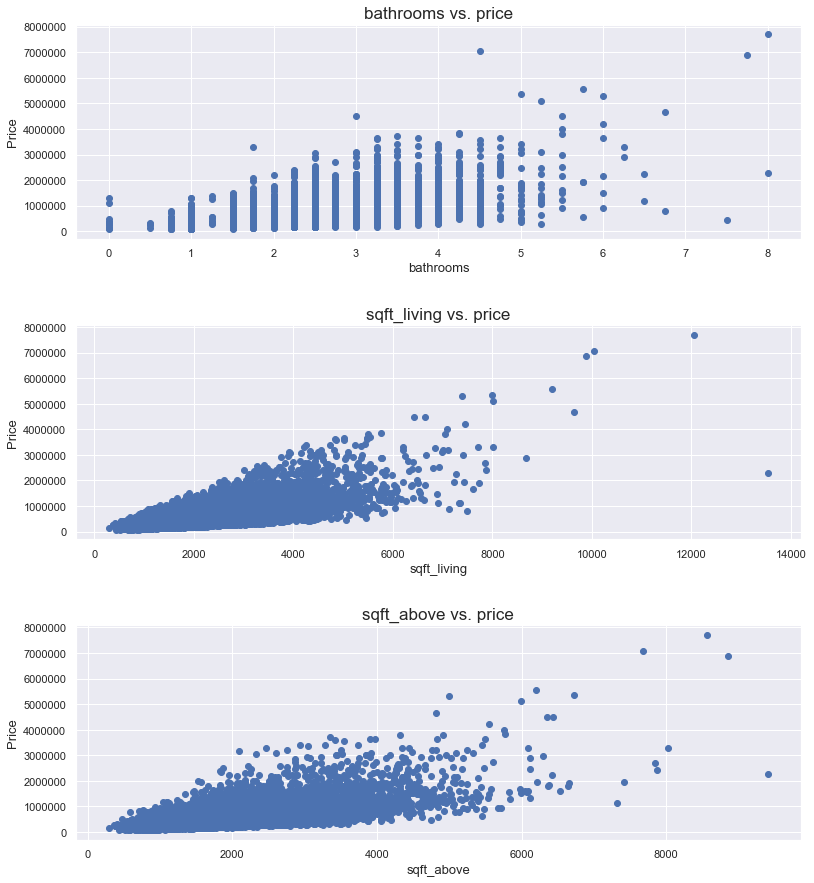

In [19]:
plt.figure(figsize=(13, 15))

features = ['bathrooms','sqft_living','sqft_above']
target = house['price']

for i, col in enumerate(features):
    plt.subplot(len(features),1, i+1)
    plt.subplots_adjust(hspace=0.4)
    x = house[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(f"{col} vs. price")
    plt.xlabel(col)
    plt.ylabel('Price')

The relationship between the price and `sqft_living` is similar to the relationship between `sqft_above` and the price.Those two variables have a high **collinearity coefficient (0.88)** which explains the phenomenon.  <br> <br> The prices of houses containing up to four bathrooms increase linearly. Prices for houses containing 4-8 bathrooms highly differ.

#### 4.2.3. Exploring the effect of renovation on price
#### `WasRenovated`

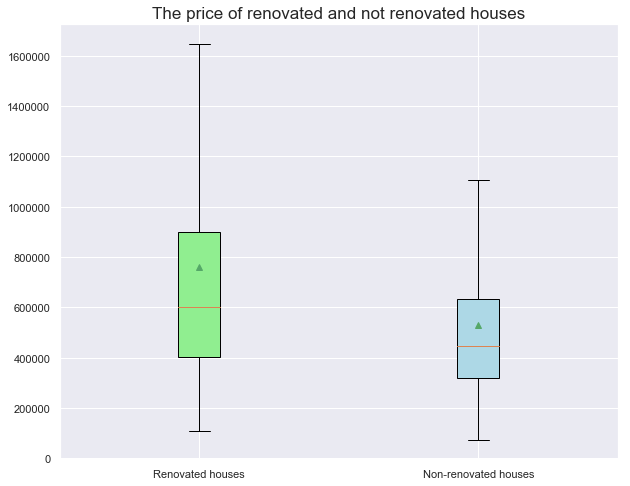

In [20]:
renovated = house[house['WasRenovated']==1]
not_renovated = house[house['WasRenovated']==0]

data = [renovated['price'],not_renovated['price']]

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(10, 8)
ax.set_title('The price of renovated and not renovated houses')
box = ax.boxplot(data, showmeans=True, showfliers=False, patch_artist = True, 
           labels =['Renovated houses','Non-renovated houses'])
colors = ['lightgreen', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

The prices for the **non-renovated houses** are lower and more concentrated around the median. <br><br>
The spread of prices for the **renovated houses** is much bigger. Prices vary the most in the last quartile group.

### 4.3. Exploring the `id`

The exploration of `id` is important to see whether the id numbers are unique for each row.

In [21]:
indx = pd.DataFrame(house['id'].value_counts().reset_index())
indx = indx.rename(columns={"index": "id", "id": "count_ids"})
print(indx)

               id  count_ids
0       795000620          3
1      2206700215          2
2       643300040          2
3      3333002450          2
4      1995200200          2
5      1781500435          2
6      3904100089          2
7      3323059027          2
8      6300000226          2
9      9809000020          2
10      723049156          2
11     1254200015          2
12     2560801222          2
13     6669020290          2
14     8651402750          2
15     3969300030          2
16     1237500540          2
17     4154300296          2
18     4302201085          2
19     1450100390          2
20     9250900104          2
21     4443800385          2
22     2892700041          2
23     5127001320          2
24     5083000375          2
25     2621600015          2
26     7129304540          2
27     4222310010          2
28     5101405604          2
29     2619920170          2
...           ...        ...
21406  2516000475          1
21407  9454200030          1
21408  8857640

Ids **aren't unique**, so this matter requires some further investigation.

In [22]:
house[house['id'].isin(indx['id'].where(indx['count_ids']>1))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Age,WasRenovated
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,75,0
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,75,0
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,17,0
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,17,0
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,92,1
325,7520000520,2015-03-11,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,93,1
345,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,71,0
346,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,71,0
371,2231500030,2014-10-01,315000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,60,0
372,2231500030,2015-03-24,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,61,0


The repeated ids suggest that some houses appear in the dataset more than one time and it depends on the fact whether the **price of the house has changed**. However, some differences in prices (e.g. for id=7888000390) are significant, therefore it would be essential to explore the root of the problem (including checking for errors in the database). <br> <br> The best way to deal with the repeated ids is to drop the `id` column before modelling.

## 5. Pre-processing data

### 5.1. Splitting the data frame into the source variables (X) and target variable (y)
**Decision Tree Regression**, **Random Forest Regression**

In [23]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,Age,WasRenovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,59,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,63,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,82,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,49,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,28,0


In [24]:
X = house.drop(columns=['price','id','date','yr_built','yr_renovated'])

In [25]:
y = house.loc[:,'price']

### 5.2. Pre-processing data for the Linear Regression Model

Before creating a Linear Regression Model it is important to check the Variance Inflation Factor to make sure that there is no high collinearity between independent variables.

In [27]:
df = add_constant(X)

pd.Series([variance_inflation_factor(df.values, i)
           for i in range(df.shape[1])],
          index=df.columns)

const            137.888867
bedrooms           1.640848
bathrooms          3.341054
sqft_living             inf
sqft_lot           1.061437
floors             1.879365
waterfront         1.201890
view               1.379485
condition          1.219465
grade              2.988733
sqft_above              inf
sqft_basement           inf
Age                1.999954
WasRenovated       1.140878
dtype: float64

`sqft_living`, `sqft_above`, `sqft_basement` are highly correlated with other variables. This means that they should be **dropped one by one** from `X` for the Linear Regression Model. <br><br>
The rest of the variables have VIF values lower than 6, so they are suitable for the model.

In [28]:
X1 = X.drop(columns=['sqft_living'])

In [29]:
df = add_constant(X1)

pd.Series([variance_inflation_factor(df.values, i)
           for i in range(df.shape[1])],
          index=df.columns)

const            137.888867
bedrooms           1.640848
bathrooms          3.341054
sqft_lot           1.061444
floors             1.879365
waterfront         1.201890
view               1.379485
condition          1.219465
grade              2.988733
sqft_above         3.863002
sqft_basement      1.912940
Age                1.999954
WasRenovated       1.140878
dtype: float64

Now all of the variables have adequate VIF scores and they will be used in the Linear Regression Model.

### 5.3. Splitting the data into training and test sets

In [30]:
#Decision Tree Regression, Random Forest Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5, shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 13)
(4323, 13)
(17290,)
(4323,)


In [31]:
#Linear Regression
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state=5, shuffle=True)
print(X1_train.shape)
print(X1_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 12)
(4323, 12)
(17290,)
(4323,)


I apportioned the data into training and test sets, with a **80% (training set)** and **20% (test set)** split. <br><br>
I chose different source variables for the Linear Regression Model as I had to drop one variable highly correlated with others (`sqft_living`). In non-linear regression models it is not necessary to drop highly correlated variables.

## 6. Linear Regression

The first model that I created was the Linear Regression model. It will be used to find linear relationship between the price and other predictors. <br><br> Cross validation will be used to evaluate the model.

In [32]:
lin_model = LinearRegression()
lin_model.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#'cv_lin' will be used to display the R-Squared
cv_lin = cross_validate(lin_model, X1, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [34]:
#Allows the evaluation of single metrics 
sorted(cv_lin.keys()) 

['fit_time',
 'score_time',
 'test_neg_mean_squared_error',
 'test_r2',
 'train_neg_mean_squared_error',
 'train_r2']

In [35]:
print(cv_lin['train_r2'])

[0.65140369 0.65309082 0.65460232 0.65123764 0.65460414]


In [36]:
print(cv_lin['test_r2'])

[0.65442731 0.64943881 0.64101765 0.65604369 0.63440052]


R-Squared values for train scores differ from **0.651 to 0.655** and for test scores from **0.641 to 0.656**.

In [37]:
y_train_predict = lin_model.predict(X1_train)
y_test_predict = lin_model.predict(X1_test)

In [38]:
def rmse_and_r2(model,y_train,y_train_predict,y_test,y_test_predict):
    '''
    a function that prints out information about the model 
    including the root-mean-square error(RMSE) and R-Squared
    '''
    train_rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    train_r2 = r2_score(y_train, y_train_predict)
    test_rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    test_r2 = r2_score(y_test, y_test_predict)
    
    print(f"The {model} model performance for training set:")
    print("--------------------------")
    print(f'RMSE = {round(train_rmse,3)}\nR2 = {round(train_r2,3)}')
    print(f"\n")
    print(f"The {model} model performance for test set:")
    print("--------------------------")
    print(f'RMSE = {round(test_rmse,3)}\nR2 = {round(test_r2,3)}')

In [39]:
rmse_and_r2('Linear Regression',y_train,y_train_predict,y_test,y_test_predict)

The Linear Regression model performance for training set:
--------------------------
RMSE = 216012.011
R2 = 0.653


The Linear Regression model performance for test set:
--------------------------
RMSE = 218031.179
R2 = 0.652


The model explains about **65%** of the variability of the response data around its mean.This is a mediocre result. <br> <br>
RMSE indicates how close the observed data points are to the model’s predicted values. The result **21 8031** in the test set suggests that it is not the best fit.

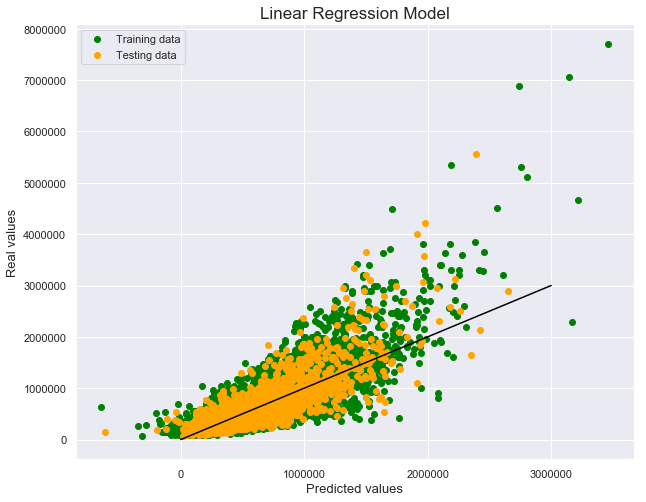

In [40]:
plt.scatter(y_train_predict, y_train, c = "green",  label = "Training data")
plt.scatter(y_test_predict, y_test, c = "orange",  label = "Testing data")
plt.title("Linear Regression Model")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend()
plt.plot([0, 3000000], [0, 3000000], c = "black")
plt.show()

The flaws of Linear Regression:
- it only models linear relationships between dependent and independent variables,
- it is highly sensitive to outliers,
- it treats data as independent.

Therefore in the case of predicting price Linear Regression is not the best model.

## 7. Decision Tree Regression

The next model is the Decision Tree Regression. It allows to explore non linear relationships between parameters and helps to conduct a comprehensive analysis of the outcomes of each possible decision.

In [41]:
regressor = DecisionTreeRegressor(min_samples_split = 100, random_state=45)

In [42]:
cv_tr = cross_validate(regressor, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [43]:
print(cv_tr['train_r2'])

[0.75307304 0.739048   0.7593591  0.76035429 0.76164234]


In [44]:
print(cv_tr['test_r2'])

[0.68105687 0.62639255 0.65991784 0.65841508 0.6258323 ]


R-Squared values for train scores differ from **0.739 to 0.762** and for test scores - from **0.626 to 0.681**. This difference indicates that the model might be overfitted.

In [45]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=100, min_weight_fraction_leaf=0.0,
           presort=False, random_state=45, splitter='best')

In [46]:
# checking the time of the model fitting
print(cv_tr['fit_time'])

[0.12500548 0.10938001 0.10938025 0.10938072 0.09375787]


In [47]:
y_train_predict = regressor.predict(X_train)
y_test_predict = regressor.predict(X_test)

In [48]:
rmse_and_r2('Decision Tree Regression',y_train,y_train_predict,y_test,y_test_predict)

The Decision Tree Regression model performance for training set:
--------------------------
RMSE = 180160.371
R2 = 0.758


The Decision Tree Regression model performance for test set:
--------------------------
RMSE = 213936.261
R2 = 0.665


Although the Decision Tree Regression model might be overfitted it is still a better model than the Linear Regression Model. <br> <br>
The model explains about **67%** of the variability of the response data around its mean and the RMSE is lower than in the Linear Regression Model.

The flaws of Decision Tree Regression:
- the complexity of preparing well-fitted decision trees,
- high chance of overfitting due to the noise in the data,
- poor performances in the case of un-correlated variables.

## 8. Random Forest Regression

The last model is the Random Forest Regression. <br> <br>The model allows training each decision tree on a different data sample. It helps to overcome the problem of overfitting.

In [49]:
reg = RandomForestRegressor(n_estimators=100, min_samples_split=100, random_state=5)
reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=100,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [50]:
cv_for = cross_validate(reg, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)

In [51]:
print(cv_for['fit_time'])

[5.96906543 5.6409235  5.7034297  5.93781376 6.46909475]


The **fitting time is much longer** than for the Decision Tree Regression model.

In [52]:
print(cv_for['train_r2'])

[0.76135274 0.76048833 0.7705034  0.76904922 0.76892099]


In [53]:
print(cv_for['test_r2'])

[0.71827305 0.71043224 0.71533174 0.70774292 0.69036876]


R-Squared values for train scores differ from **0.760 to 0.770** and for test scores - from **0.690 to 0.718**. <br> <br>This shows that the Random Forest Regression model is fitted better than Decision Tree Regression model and has higher R-Squared scores.

In [54]:
y_train_predict = reg.predict(X_train)
y_test_predict = reg.predict(X_test)

In [55]:
rmse_and_r2('Random Forest Regression',y_train,y_train_predict,y_test,y_test_predict)

The Random Forest Regression model performance for training set:
--------------------------
RMSE = 176485.44
R2 = 0.768


The Random Forest Regression model performance for test set:
--------------------------
RMSE = 195169.107
R2 = 0.721


The model explains about **72%** of the variability of the response data around its mean and the RMSE is lower than in both of the previous models.

The flaws of Random Forest Regression:
- the prediction process is more time-consuming than other algorithms,
- complexity in constructing.

## 9. The visual comparison of regression models

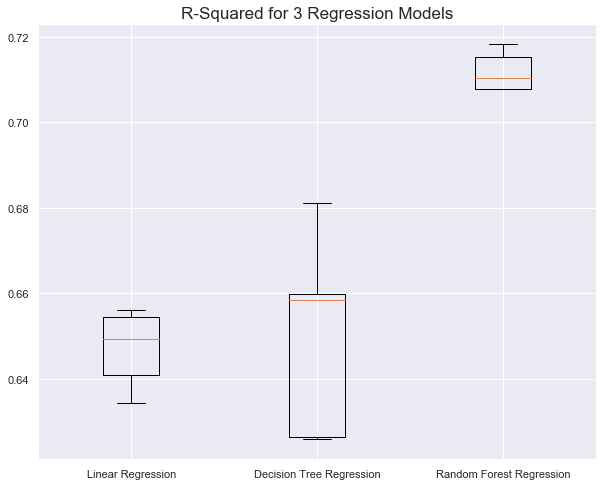

In [57]:
data = [cv_lin['test_r2'], cv_tr['test_r2'],cv_for['test_r2']]
fig3, ax3 = plt.subplots()
ax3.set_title('R-Squared for 3 Regression Models')
ax3.boxplot(data, showfliers=False, 
            labels=['Linear Regression','Decision Tree Regression','Random Forest Regression'])

plt.show()

The visualisation proves that the **Random Forest Regression** is the best model, as it has the highest R-Squared.

## 9. Results and potential next steps

#### Results:
- The majority of houses cost from 300k to 700k,
- Features that have the strongest correlation coefficient with the price include: grade, view, number of bathrooms, living space area, living area above ground level,
- To predict house prices it is recommended to use a regression model,
- The Random Forest Regression Model shows the best performance (RMSE = 195169.107, R2 = 0.721), however, each of the models has advantages and flaws.

#### Potential next steps:
- To evaluate the model it would be crucial to further explore the variables to select the most suitable for the model (e.g. using Lasso or Python implementations of the Boruta R package),
- Feature engineering could be conducted to improve the models. It can include exploring the attractiveness of the area in the context of touristic attractions, industry, nature or criminality (as `zipcode`, `lat` and `long` are available),
- The Decision Tree Regression and Random Forrest Regression models could be also improved by tuning hyperparemeters,
- More models could be built in order to find a model with the best performance (e.g. XGBRegressor),
- More metrics should be explored, besides R-Squared.